In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df = pd.read_csv('Credit_card.csv')
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
#1
# I imporved on the column names so that they look more uniform by converting the all capital column names 
# to proper names.
credit_df.columns = credit_df.columns.str.replace("EDUCATION","Education")
credit_df.columns = credit_df.columns.str.replace("CHILDREN","Children")
credit_df.columns = credit_df.columns.str.replace("GENDER","Gender")
credit_df.head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
# Another thing I did was encode the different education levels with its label and thereby 
# converting to numerical values.
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
credit_df['Education_type'] = class_labels.fit_transform(credit_df['Education'].values)
credit_df.head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Education_type
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
#2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = credit_df.drop('Education_type', axis=1)
y = credit_df['Education_type']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   test_size=0.3, 
                                                   random_state=32)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

X = credit_df.drop(['Gender','Car_Owner','Propert_Owner','Type_Income','Education','Marital_status','Housing_type','Type_Occupation','Annual_income','Birthday_count'], axis = 1)
y = credit_df['Education_type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =32)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(y_predict)
print(type(y_predict))

[1 4 4 1 4 4 4 1 4 1 4 4 1 1 4 4 4 4 1 4 4 4 4 1 4 1 4 1 4 4 1 4 4 1 4 4 4
 4 4 4 1 4 1 4 1 4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 1 4 1 1 1 4 4 4 1 4 1 4
 4 4 4 4 1 4 1 1 4 1 4 1 1 1 1 4 1 4 1 1 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 1 4 4 4 4 4 4 1 4 4 1 4 4 1 4 1 1 4 4 4 4 1 1 1 4 4 1 4 1 4
 4 4 4 4 1 1 4 4 4 4 4 1 4 4 1 4 1 4 4 4 4 4 4 1 4 4 4 4 4 4 1 4 4 4 4 1 1
 4 1 4 4 1 1 4 1 4 1 4 1 1 4 1 1 4 4 4 1 4 4 1 4 1 4 4 4 4 4 4 4 4 4 1 4 4
 1 4 4 4 1 1 4 4 4 4 1 4 1 4 4 4 4 4 1 4 4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 4 4
 4 4 4 4 1 1 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4
 4 1 4 4 1 4 1 4 4 4 1 1 4 1 4 4 1 1 4 1 4 4 1 4 1 4 4 1 1 4 4 1 4 4 4 4 4
 4 4 1 4 1 4 4 4 1 1 1 4 4 4 4 4 1 4 4 4 4 1 4 1 4 4 4 4 4 1 1 4 4 1 1 4 4
 4 4 1 1 1 4 4 4 1 4 4 1 4 1 4 4 4 4 1 4 4 1 4 4 1 4 1 4 4 4 4 1 4 4 4 1 1
 1 1 4 4 4 1 1 4 4 4 1 4 4 1 4 1 1 4 4 4 4 1 1 4 4 1 4 4 1 4 1 4 4 4 4 1 4
 4 1 1 4 4 4 1 4 4 4 1 4 4 1 4 4 4 4 1 4 4]
<class 'numpy.ndarray'>


In [7]:
print(knn.score(X_test, y_test))

0.9440860215053763


In [8]:
regression = LogisticRegression(random_state=32).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [9]:
y_predicted

array([1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 2, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4,
       1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1,
       1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 2, 4, 1, 1, 4, 1, 4, 1, 1, 1,
       1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1,
       4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 2, 2, 4, 1, 4, 1, 4, 1, 1,
       4, 1, 2, 4, 4, 4, 1, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 2, 1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1,

In [10]:
regression.score(X_test, y_test)

0.9806451612903225

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [12]:
model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=32)

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(knn.score(X_resampled, y_resampled))

0.4


In [15]:
regression.score(X_resampled, y_resampled)

0.6

I chose oversampling for this dataset. I chose oversampling because it is more frequently used and this dataset is for fraud detection as well. However, oversampling on the dataset seems to have made the knn score and regression score less than it was before.

In [23]:
#3
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [24]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(465, 5)

In [25]:
class_of_interest = 'Education'
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)
class_id

/tmp/ipykernel_14757/2820264446.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)


array([], dtype=int64)

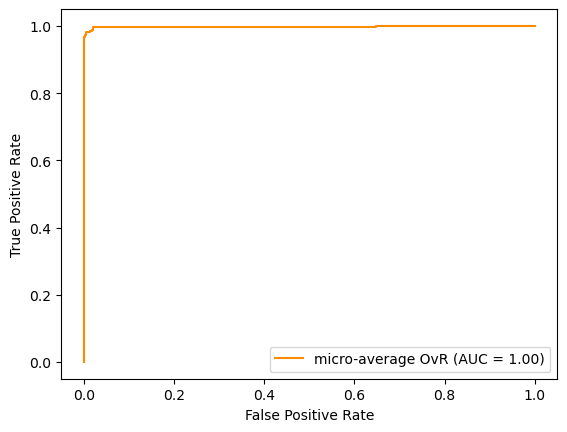

In [27]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

In [28]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class='ovr',
    average='micro')
print(micro_roc_auc_ovr)

0.9976633136778819


In [29]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)
print(macro_roc_auc_ovr)

0.888658346176525


In [30]:
#4

from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC()
clf.fit(X, y)
SVC()

SVC()

In [31]:
classifier = SVC(kernel='linear')

In [36]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(y_pred)

[1 4 4 1 4 4 4 1 4 1 4 4 1 2 4 4 4 4 1 4 4 4 4 1 4 1 3 1 4 4 1 4 4 1 4 4 4
 4 4 4 1 4 1 4 1 4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 1 4 1 1 1 4 4 4 1 4 1 4
 4 4 4 4 2 4 1 1 4 1 4 1 1 1 1 4 1 4 1 1 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 2 4 4 4 4 4 4 1 4 4 1 4 4 1 4 1 1 4 4 4 4 1 1 1 4 4 1 4 1 4
 4 3 4 4 1 1 4 4 4 1 4 1 4 4 1 4 1 4 4 4 4 3 4 1 4 4 3 4 4 4 1 4 4 4 4 1 1
 4 1 4 4 2 2 3 1 4 1 4 1 1 4 1 2 4 4 4 1 4 4 2 4 2 4 4 4 3 4 4 4 4 4 1 4 4
 1 4 4 4 2 1 4 4 4 4 1 4 1 4 4 4 4 4 1 4 4 4 4 1 4 4 4 4 2 4 4 4 4 4 4 4 4
 4 4 4 4 1 1 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4
 4 1 4 4 1 4 1 4 4 4 1 1 4 1 4 4 2 1 4 1 4 4 1 4 1 4 4 1 1 4 4 1 4 4 4 4 4
 4 4 1 4 1 4 4 4 1 2 1 4 4 4 4 4 1 4 4 4 4 1 4 1 4 4 4 4 4 1 1 4 4 1 1 4 4
 4 4 1 1 1 4 4 4 1 4 4 1 4 1 4 4 4 4 1 4 4 1 4 4 1 4 1 4 4 4 4 1 4 4 4 1 2
 2 1 4 4 4 1 1 4 4 4 2 3 3 1 4 1 1 4 4 4 4 1 1 4 4 1 4 4 1 4 1 4 4 4 4 1 4
 4 1 1 4 4 4 1 4 4 4 2 4 4 1 4 4 4 4 1 4 4]


In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978494623655914


The SVM model seems to have performed well with an accuracy score of 0.99.

5. Outlier detection is the finding or determining of data points that are the extreme values of a distribution of data points in comparison to other data point. Typically, they would be significantly different from other datapoints in that distribution. It is important because they are typically used in situations such as fraud detection or cybersecurity where having accurate information is important. Hence, outliers tend to correspond with rare or uncommon events that may such as those cyberattacks or fraud detections. Therefore, outlier detection aids in quantifying the common events and using them as a reference for identifying abnormalities in data. Outliers can also help identify errors in measurement, bad data collection, or show variables that were not considered when collecting the data. Some methods you can use for outlier detection include box plots, isolation forests, and OneClassSVM. Each method has its own purpose and when it can be used. For example, box plots would be typically used for smaller data, while OneClassSVM would be used for larger and multimodal datasets. Isolation forests would be in the middle.